In [2]:
from env import host, username, password
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt

### 1. Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [3]:
#load the mpg dataset
mpg = data('mpg')
#use show_doc to read documentation for it
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




### a. On average, which manufacturer has the best miles per gallon?

In [4]:
#add an average mpg between both city and highway mpg
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
#make a new dataframe grouped by the manufacturer and make the columns their aggregated average values
avg_mpg = mpg.groupby('manufacturer').agg({'cty': 'mean', 'hwy': 'mean', 'average_mileage': 'mean'})
#sort these so you can see the top averages
avg_mpg.sort_values(by='average_mileage', ascending=False)

,cty,hwy,average_mileage
manufacturer,,,
honda,24.444444,32.555556,28.500000
volkswagen,20.925926,29.222222,25.074074
hyundai,18.642857,26.857143,22.750000
subaru,19.285714,25.571429,22.428571
audi,17.611111,26.444444,22.027778
toyota,18.529412,24.911765,21.720588
pontiac,17.000000,26.400000,21.700000
nissan,18.076923,24.615385,21.346154
chevrolet,15.000000,21.894737,18.447368


In [5]:
avg_mpg.sort_values(by='average_mileage', ascending=False).head(1)
#This shows that honda is the top manufacturer for mpg

,cty,hwy,average_mileage
manufacturer,,,
honda,24.444444,32.555556,28.5


### b. How many different manufacturers are there?

In [6]:
#Combining a len function with a .unique method finds that there are 15 manufacturers
len(mpg['manufacturer'].unique())

15

### c. How many different models are there?

In [7]:
#Similarly combining len and .unique there are 38 different models
len(mpg['model'].unique())

38

### d. Do automatic or manual cars have better miles per gallon?

In [8]:
#Add column trans_cat that has a value of 'auto' if transmission is any kind of automatic and manual if not
mpg['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
#group by trans_cat column and find the mean of average_mileage for both automatic and manual
auto_vs_trans = mpg.groupby('trans_cat').agg({'average_mileage': 'mean'})
#sor the values in descending order
auto_vs_trans.sort_values(by='average_mileage', ascending=False)

,average_mileage
trans_cat,
manual,22.227273
auto,19.130573


### 2. Joining and Merging

### Copy the users and roles dataframes from the examples above.

In [9]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [10]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


### What do you think a right join would look like? 

In [11]:
#right join of users and roles
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


### An outer join? 

In [12]:
#outer join of users and roles
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


### What happens if you drop the foreign keys from the dataframes and try to merge them?

In [13]:
#drop the foreign key of users
users = users.drop(columns = ['role_id'])
#this should produce an error due to no foreign key
pd.merge(users, roles, left_on = 'role_id', right_on = 'id')

KeyError: 'role_id'

In [14]:
users

,id,name
0,1,bob
1,2,joe
2,3,sally
3,4,adam
4,5,jane
5,6,mike


### 3. Getting data from SQL databases

### a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [3]:
#function that creates url for connecting to SQL server
def get_db_url(user, pw, h, db_name):
    #create string for url
    url = f'mysql+pymysql://{user}:{pw}@{h}/{db_name}'
    #return url
    return url
#variable for connecting to SQL without having to use function multiple times
emp_url = get_db_url(username, password, host, 'employees')

### b. Use your function to obtain a connection to the employees database.

In [4]:
#use read_sql to connect to sql server using get_db_url function
pd.read_sql('SELECT * FROM employees', get_db_url(username, password, host, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


### c. Once you have successfully run a query:

Intentionally make a typo in the database url. What kind of error message do you see?

In [17]:
#misspelling the database gives you an operational access denied error
pd.read_sql('SELECT * FROM employees', get_db_url(username, password, host, 'empdloyees'))

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'darden_1036'@'%' to database 'empdloyees'")
(Background on this error at: http://sqlalche.me/e/e3q8)

Intentionally make an error in your SQL query. What does the error message look like?

In [18]:
#misspelling a sql query gives a programming error
pd.read_sql('SELECT * FROM eployees', emp_url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.eployees' doesn't exist")
[SQL: SELECT * FROM eployees]
(Background on this error at: http://sqlalche.me/e/f405)

### d. Read the employees and titles tables into two separate dataframes

In [5]:
#use read_sql to read employees table
employees = pd.read_sql('SELECT * FROM employees', emp_url)
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [6]:
#use read_sql to read titles table
titles = pd.read_sql('SELECT * FROM titles', emp_url)
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


### e. Visualize the number of employees with each title.

Text(0, 0.5, 'Titles')

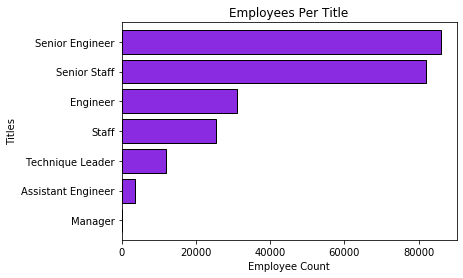

In [15]:
#create table cur_titles to find all current titles
cur_titles = pd.read_sql('SELECT * FROM titles WHERE to_date > CURDATE()', emp_url)
#create num_titles using groupby title and count to find count of titles
num_titles = cur_titles.groupby('title').count()
#sort num_titles
num_titles = num_titles.sort_values('emp_no')
#plot bar graph of number of titles
plt.title('Employees Per Title')
plt.xlabel('Employee Count')
num_titles.emp_no.plot(color = 'blueviolet', ec='black', width = .8, kind = 'barh')
plt.ylabel('Titles')

### f. Join the employees and titles dataframes together.

In [25]:
#create emp_titles table that contains the joined tables of employees and titles
emp_titles = pd.read_sql('SELECT * FROM employees as e JOIN titles as t ON e.emp_no = t.emp_no', emp_url)
emp_titles

,emp_no,birth_date,first_name,last_name,gender,hire_date,emp_no,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,10002,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,499998,Staff,1993-12-27,1998-12-27


### g. Visualize how frequently employees change titles.

In [17]:
#create dataframe of dept_emp table with only current employees
dept_emp = pd.read_sql('SELECT * FROM dept_emp as de WHERE de.to_date > CURDATE()', emp_url)
#create emp_titles dataframe by merging current dept_emp employees with their titles from titles table
emp_titles = pd.merge(dept_emp, titles, left_on='emp_no', right_on='emp_no')
#create agg_emp_titles by grouping employee number and counting titles per person
agg_emp_titles = emp_titles.groupby('emp_no').title.agg(['count'])
#merge with emp_titles in order to create a new column on emp_titles
agg_emp_titles = pd.merge(emp_titles, agg_emp_titles, left_on='emp_no', right_on='emp_no')

Text(0.5, 1.0, 'Employees With Multiple Titles')

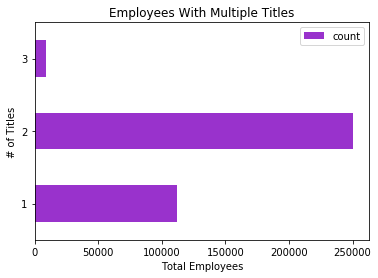

In [19]:
#groupby the count column and and count the amount of employees in each count of titles
count_of_titles = agg_emp_titles.groupby('count').emp_no.agg(['count'])
#plot a bar graph of the employees
count_of_titles.plot(color = 'darkorchid',kind='barh')
#Change the x, y, and title labels
plt.xlabel('Total Employees')
plt.ylabel('# of Titles')
plt.title('Employees With Multiple Titles')

### h. For each title, find the hire date of the employee that was hired most recently with that title.

In [32]:
#create a table that are all current titles
cur_titles = pd.read_sql('SELECT * FROM titles as t WHERE to_date > CURDATE()', emp_url)
#merge current titles with the employees table
cur_titles = pd.merge(cur_titles, employees, left_on='emp_no', right_on='emp_no', how='inner')
#group up all titles and find the max hire_date
recent_hires = cur_titles.groupby('title').hire_date.agg(['max'])
recent_hires

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-23
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-15


### i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [68]:
#create table of department employees with only current employees
dept_emp = pd.read_sql('SELECT * FROM dept_emp as de WHERE to_date > CURDATE()', emp_url)
#create table of all departments with names and id
depts = pd.read_sql('SELECT * FROM departments', emp_url)
#merge dept_emp and depts tables
emps_with_dept_names = pd.merge(dept_emp, depts, left_on = 'dept_no', right_on = 'dept_no', how = 'inner')
#merge the current titles table with emps_with_dept_names
titles_depts = pd.merge(cur_titles, emps_with_dept_names, left_on = 'emp_no', right_on = 'emp_no', how = 'inner')
#use crosstab to generate a cross tabulation of the number of titles by department
xtab_dept_titles = pd.crosstab(titles_depts.dept_name, titles_depts.title)

In [69]:
xtab_dept_titles

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,11268,3574,241
Development,1652,14040,1,38816,1085,315,5477
Finance,0,0,1,0,9545,2891,0
Human Resources,0,0,1,0,9824,3073,0
Marketing,0,0,1,0,11290,3551,0
Production,1402,12081,1,33625,1123,349,4723
Quality Management,389,3405,1,9458,0,0,1293
Research,77,830,1,2250,9092,2870,321
Sales,0,0,1,0,28797,8903,0


### 4. Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

### a. What is the total price for each order?

In [20]:
#generate chipotle url for access to sql server
chip_url = get_db_url(username, password, host, 'chipotle')
#create chipotle table
chipotle = pd.read_sql('SELECT * FROM orders', chip_url)
#create a new table while also adding a new column float_price which is a float type version of item_price
price_float = chipotle.assign(float_price = chipotle['item_price'].str.replace('$', '').astype(float))

In [21]:
#groupby order_id on price_float and find the sum of each order id's float price
price_float.groupby('order_id').float_price.agg(['sum'])

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


### b. What are the most popular 3 items?

In [22]:
#create item_counts table by grouping item_name on chipotle and suming each items quantity
item_counts = chipotle.groupby('item_name').quantity.agg(['sum'])
#sort the values in descending order and use .head(3) to only get back the top 3
item_counts.sort_values(by = 'sum', ascending=False).head(3)

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


### c. Which item has produced the most revenue?

In [23]:
#create item_revenue table by grouping item name on chipotle and summing each items float_price
item_revenue = price_float.groupby('item_name').float_price.agg(['sum'])
#sort values in descending order and only take the top result
item_revenue.sort_values('sum', ascending=False).head(1)

,sum
item_name,
Chicken Bowl,7342.73
